In [72]:
def song_pick_reward(p0,p1,L,d=2):
    '''
    Inputs
    -----------------------
    p0 - position of previous song in playlist
    p1 - position of picked song in playlist
    L - length of playlist
    d - bias term, defaults to 2
    
    Local variables
    -------------------------
    z - minimum reward for song in playlist after 
    b4 - reward for song in playlist before
    d - bias term, changes the power term in the curve
    '''
    
    z = .75
    b4 = .5
    
    if p1 == None:
        #song not in playlist
        return 0
    elif p0 == p1:
        #they are the same song
        #raise Exception('Songs are the same.')
        return None
    if p1 < p0:
        #song occurs previously
        return b4
    elif p1 > p0:
        #the typical case
        #minimum of (z,L)
        return ((1-z) * (L - p1)**d)/((L-(p0+1))**d) + z

In [68]:
import matplotlib.pyplot as plt
import numpy as np

Text(0,0.5,'Reward')

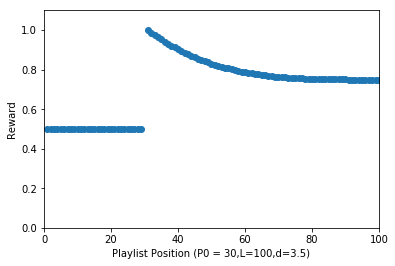

In [90]:
L = 100
x = np.arange(1,L+1)
y = np.array([song_pick_reward(30,i,L,d=3.5) for i in x])
plt.scatter(x,y)
plt.xlim(0, 100)
plt.ylim(0, 1.1)
plt.xlabel('Playlist Position (P0 = 30,L=100,d=3.5)')
plt.ylabel('Reward')

$$ R(P_0) = \frac{(1-z)(L-P_1)^\delta}{(L-(P_0+1))^\delta} + z $$

<center>
$
R(P_0) = \begin{cases} 
      b_4 & P_1 < P_0 \\
      (1-z)\bigg(\frac{L-P_1}{L-(P_0+1)}\bigg)^\delta + z & P_1 > P_0
   \end{cases}
$
</center>